# Introduction to Deep Learning with Keras

## 1.Introducing Keras

**When to use neural networks?**
- Dealing with unstructured data
- Don't need easily interpretable results
- You can benefit from a known architecture

**Example:** Classify images of cats and dogs

### Defining a neural network

We want to build a neural network like in the picture below!

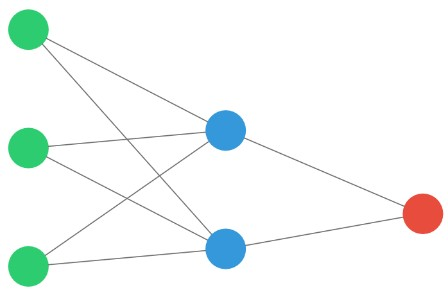

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a new sequential model
model = Sequential()
# Add and input and dense layer
model.add(Dense(2, input_shape=(3,)))
# Add a final 1 neuron layer
model.add(Dense(1))

### Adding activations
Add activations on the hidden layer like in the picture below!

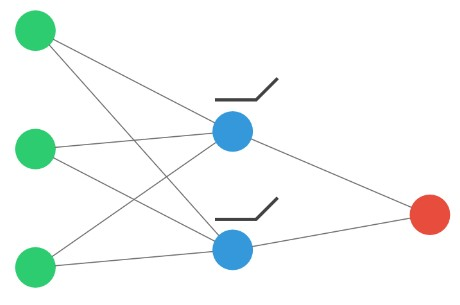

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a new sequential model
model = Sequential()
# Add and input and dense layer
model.add(Dense(2, input_shape=(3,),
               activation = 'relu'))
# Add a final 1 neuron layer
model.add(Dense(1))

### Summarize model
Parameters are obtained from connected neurons from the input to the hidden layer plus the bias on the neurons in the hidden layer.

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


### Practice 1
- Import the Sequential model from tensorflow.keras.models and the Denselayer from tensorflow.keras.layers.
- Create an instance of the Sequential model.
- Add a 10-neuron hidden Dense layer with an input_shape of two neurons.
- Add a final 1-neuron output layer and summarize your model with summary().

In [4]:
# Import the Sequential model and Dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()
# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Practice 2
- Instantiate a new Sequential() model.
- Add a Dense() layer with five neurons and three neurons as input.
- Add a final dense layer with one neuron and no activation.

In [5]:
# Instantiate a new Sequential model
model = Sequential()

# Add a Dense layer with five neurons and three inputs
model.add(Dense(5, input_shape=(3,), activation="relu"))

# Add a final Dense layer with one neuron and no activation
model.add(Dense(1))

# Summarize your model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


### Compiling
The .compile() method takes arguments such as the optimizer, used for weight updating, and the loss function, which is what we want to minimize.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a new sequential model
model = Sequential()
# Add and input and dense layer
model.add(Dense(2, input_shape=(3,),
               activation = 'relu'))
# Add a final 1 neuron layer
model.add(Dense(1))

# Compiling your previously built model
model.compile(optimizer="adam", loss="mse")

### Training

In [ ]:
# Train your model
model.fit(X_train, y_train, epochs=5)

### Predicting

In [ ]:
# Predict on new data
preds = model.predict(X_test)
# Look at the predictions
print(preds)

## 2. Going Deeper

### Binary Classification
- to : solve problems where you predict whether an observation belongs to one of two possible classes.
- use seaborn's pairplot function to explore a small dataset and identify whether our classification problem will be easily separable.
- The sigmoid activation function squashes the neuron output of the second to last layer to a floating point number between 0 and 1.
- We will use stochastic gradient descent as an optimizer and binary cross-entropy as our loss function. Binary cross-entropy is the function we use when our output neuron is using sigmoid as its activation function.
- We train our model for 20 epochs passing our coordinates and labels as parameters. Then, we obtain the predicted labels by calling predict on coordinates.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate a sequential model
model = Sequential()
# Add input and hidden layer
model.add(Dense(4, input_shape=(2,),
                activation='tanh'))
# Add output layer, use sigmoid 
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='sgd', loss='binary_crossentropy')

# Train model
model.train(coordinates, labels, epochs=20)

# Predict with trained model
preds = model.predict(coordinates)

### Practice 1
- Import the Sequential model and Dense layer from tensorflow.keras.
- Create a sequential model.
- Add a 4 neuron input layer with the input_shape parameter and a 1 neuron output layer with sigmoid activation.
- Compile your model using sgd as an optimizer.

In [ ]:
# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd',
              metrics=['accuracy'])

# Display a summary of your model
model.summary()

### Practice 2
For example, the dataset has already been partitioned into features: X_train & X_test, and labels: y_train & y_test.

Try to:
- Train your model for 20 epochs calling .fit(), passing in the training data.
- Check your model accuracy using the .evaluate() method on the test data.
- Print accuracy.

In [ ]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

### Multi-class Classification

* to : solve problems where you predict whether an observation belongs to more than two possible classes.
* we must make sure the total sum of probabilities for the output neurons equals one. We achieve this with the softmax activation function which is used in the output layer
* Difference with the binary, when compile the model we use 'categorical cross-entropy' or 'log loss' and at the dense of the output layer, use the numbers of class we want to classify
* Categorical cross-entropy measures the difference between the predicted probabilities and the true label of the class we should have predicted.

In [ ]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Preparing the data
For example the dart's dataset is loaded as darts. Pandas is imported as pd.
- Use the Categorical() method from pandas to transform the competitor column.
- Assign a number to each competitor using the cat.codes attribute from the competitor column.

In [ ]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

The coordinates features and competitors labels you just transformed have been partitioned into coord_train,coord_test and competitors_train,competitors_test.

Your model is also loaded.
- Train your model on the training data for 200 epochs.
- Evaluate your model accuracy on the test data.

In [ ]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test,competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

- Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

- When computing accuracy with the model's .evaluate() method, your model takes the class with the highest probability as the prediction. np.argmax() can help you do this since it returns the index with the highest value in an array.

- np.argmax() returns the position of the highest value in a vector. Each prediction from your network is a vector. You want to know the element with the highest probability of such vector, since it represents the competitor with the highest chance of having thrown the dart.

In [ ]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

### Multi-label Classification

use sigmoid outputs because we no longer care about the sum of probabilities. We want each output neuron to be able to individually take a value between 0 and 1. This can be achieved with the sigmoid activation because it constrains our neuron output in the range 0-1.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate model
model = Sequential()

# Add input and hidden layers
model.add(Dense(2, input_shape=(1,)))

# Add an output layer for the 3 classes and sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile the model with binary crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train your model, recall validation_split
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

### Practice 3
- Instantiate a Sequential() model.
- Add a hidden layer of 64 neurons with as many input neurons as there are sensors and relu activation.
- Add an output layer with as many neurons as parcels and sigmoidactivation.
- Compile your model with the adam optimizer and binary_crossentropy loss.

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64,input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

### Practice 4
An output of your multi-label model could look like this: [0.76 , 0.99 , 0.66 ]. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels [1,1,1]. For this particular problem, this would mean watering all 3 parcels in your farm is the right thing to do, according to the network, given the input sensor measurements.

You will now train and predict with the model you just built. sensors_train, parcels_train, sensors_test and parcels_test are already loaded for you to use.

- Train the model for 100 epochs using a validation_split of 0.2.
- Predict with your model using the test data.
- Round up your preds with np.round().
- Evaluate your model's accuracy on the test data.

In [ ]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train,parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test,parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

### Keras callbacks
keras callback is a block of code that gets executed after each epoch during training or after the training is finished. They are useful to store metrics as the model trains and to make decisions as the training goes by.

In [ ]:
# Training a model and saving its history
history = model.fit(X_train, y_train, epochs=100, metrics=['accuracy'])
print(history.history['loss'])
print(history.history['accuracy'])

In [ ]:
# Training a model and saving its history
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
                    metrics=['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

### History plots

In [ ]:
# Plot train vs test accuracy per epoch
plt.figure()

# Use the history metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Make it prettyplt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

### Early stopping
* Early stopping a model can solve the overfitting problem. Since it stops its training when it no longer improves.
* The early stopping callback can monitor several metrics, like validation accuracy, validation loss, etc. These can be specified in the monitor parameter. 
* It's also important to define a patience argument, that is the number of epochs to wait for the model to improve before stopping it's training. 

In [ ]:
# Import early stopping from keras callbacks
from tensorflow.keras.callbacks import EarlyStopping

# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train your model with the callback
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
          callbacks = [early_stopping])


### Model checkpoint
The model checkpoint callback allows us to save our model as it trains. We specify the model filename with a name and the .hdf5 extension. You can also decide what to monitor to determine which model is best with the monitor parameter, by default validation loss is monitored. Setting the save_best_only parameter to True guarantees that the latest best model according to the quantity monitored will not be overwritten.

In [ ]:
# Import model checkpoint from keras callbacks
from keras.callbacks import ModelCheckpoint
# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5', save_best_only=True)
# Train your model with the callback
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
          callbacks = [model_save])


### Practice 5
- Train your model on X_train and y_train, validate each epoch on X_test and y_test.
- Use plot_lossextracting lossand val_loss from h_callback.
- Use plot_accuracyextracting accuracyand val_accuracy from h_callback.

In [ ]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 25,
               validation_data=(X_test,y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

### Practice 6
- Import the EarlyStoppingcallback from tensorflow.keras.callbacks.
- Define a callback, monitor 'val_accuracy' with a patience of 5 epochs.
- Train your model using the early stopping callback.

In [ ]:
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test,y_test),
           callbacks= [monitor_val_acc])

### Practice 7
- Import both the EarlyStopping and ModelCheckpoint callbacks from tensorflow.keras.
- Create monitor_val_acc as an EarlyStopping callback that will monitor 'val_accuracy', with a patience of 3 epochs.
- Create model_checkpoint as a ModelCheckpointcallback, save the best model as best_banknote_model.hdf5.
- Fit your model providing a list with the defined callbacks and X_test and y_test as validation data.

In [ ]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)

# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, model_checkpoint],
                    validation_data = (X_test, y_test))